<a href="https://colab.research.google.com/github/rsher60/Walmart_sales_prediciton/blob/master/Walmart_Sales_prediction_riddhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder , StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [130]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
train_data=pd.read_csv('gdrive/My Drive/train.csv')

In [0]:
features = pd.read_csv('gdrive/My Drive/features.csv')

In [0]:
stores = pd.read_csv('gdrive/My Drive/stores.csv')

In [0]:
df_main = pd.merge(train_data, features, how='left')

In [0]:
df_main2 = pd.merge(df_main,stores, how='left')

In [148]:
df_main2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [149]:
df_main2.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


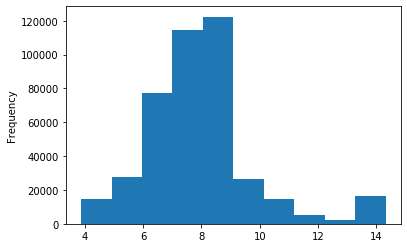

In [150]:
df_main2['Unemployment'].plot.hist()

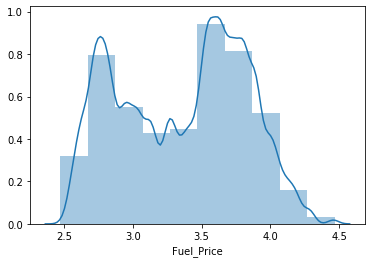

In [151]:
sns.distplot(df_main2['Fuel_Price'], bins=10)

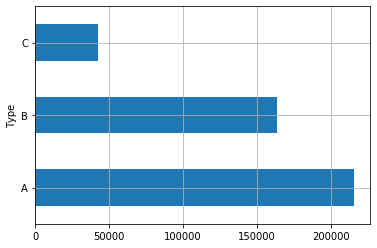

In [152]:
type_cnt = df_main2.groupby('Type').size()
type_cnt.plot.barh(label=True, grid=True)

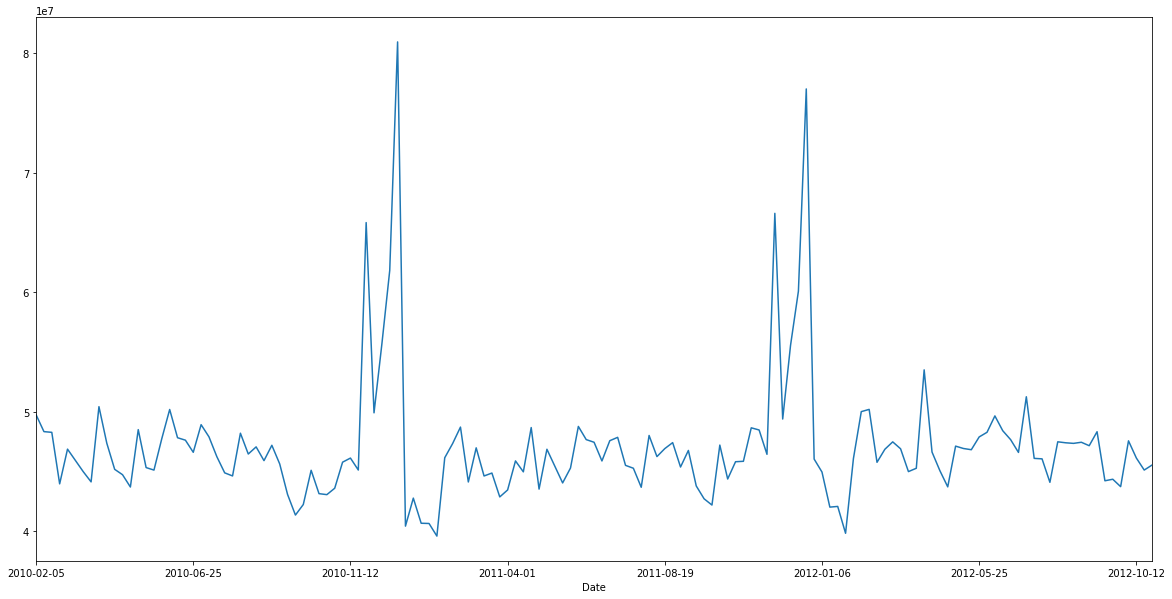

In [153]:
fig, ax = plt.subplots(figsize=(20,10))

df_main2.groupby(['Date']).sum()['Weekly_Sales'].plot(ax=ax)

In [154]:
#Correlation Matrix
corr = df_main2.corr()
corr

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,-0.182881
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837,-0.002966
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,0.243828
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460,0.000593
Temperature,-0.050097,0.004437,-0.002312,-0.155949,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,-0.058313
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,0.003361
MarkDown1,-0.119588,-0.002426,0.085251,-0.035586,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,0.345673
MarkDown2,-0.035173,0.000290,0.024130,0.334818,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,0.108827
MarkDown3,-0.031556,0.001784,0.060385,0.427960,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,0.048913
MarkDown4,-0.009941,0.004257,0.045414,-0.000562,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963,0.168196


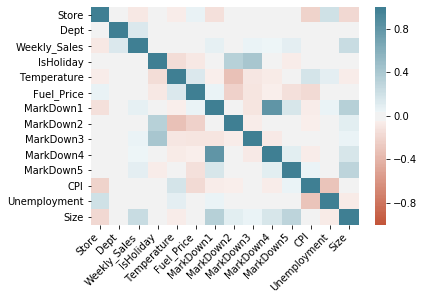

In [155]:
#Correlation Heatmap
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200)
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

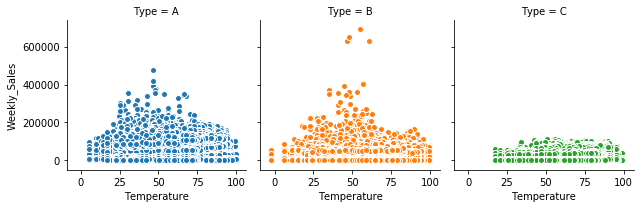

In [156]:
g = sns.FacetGrid(df_main2, col="Type", hue="Type")
g = (g.map(plt.scatter, "Temperature", "Weekly_Sales", edgecolor="w"))

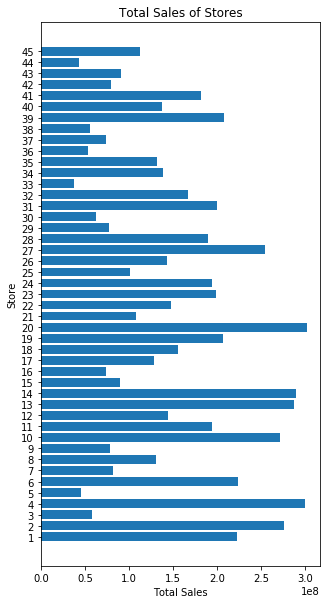

In [157]:
#Total sales of each store
store_total_sales = pd.DataFrame(df_main2.groupby('Store')['Weekly_Sales'].sum())
store_total_sales.index.name = 'Store'
store_total_sales.reset_index(inplace=True)
plt.figure(figsize=(5, 10))
plt.barh(store_total_sales['Store'], store_total_sales['Weekly_Sales'])
plt.yticks(store_total_sales['Store'])
plt.xlabel('Total Sales')
plt.ylabel('Store')
plt.title('Total Sales of Stores')
plt.show()  


In [0]:
df_main2.dtypes
#since the date is in the data type as object --> converting that to a pandas datetime object

df_main2.Date = pd.to_datetime(df_main2.Date)


In [0]:

df_main2.Date[1]
df_main2["Month"]  = df_main2['Date'].map(lambda x : x.month)

In [0]:

df_main2["Year"] = df_main2['Date'].map(lambda x: x.year)

In [0]:
df_main2["date_of_month"] = df_main2['Date'].map(lambda x: x.day)

In [162]:
df_main2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year,date_of_month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2,2010,5
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2,2010,12
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2,2010,19
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2,2010,26
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,3,2010,5


In [0]:
#df_main2 = df_main2.drop('Year',axis=1)

In [0]:
df_main2 = df_main2.fillna(0)

In [0]:
#df_main2.Date

In [0]:
le_list = ['IsHoliday','Type']
le = LabelEncoder()
for i in le_list :
  df_main2[i] = le.fit_transform(df_main2[i])



In [167]:
df_main2.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year,date_of_month
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,2,2010,5
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315,2,2010,12
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315,2,2010,19
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315,2,2010,26
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315,3,2010,5


In [0]:
df_main2 = df_main2.drop('Date',axis=1)

In [169]:
df_main2.describe()


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year,date_of_month
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,0.070358,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.589912,136727.915739,6.449510,2010.968591,15.673131
std,12.785297,30.492054,22711.183519,0.255750,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328,3.243217,0.796876,8.753549
min,1.000000,1.000000,-4988.940000,0.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,34875.000000,1.000000,2010.000000,1.000000
25%,11.000000,18.000000,2079.650000,0.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,93638.000000,4.000000,2010.000000,8.000000
50%,22.000000,37.000000,7612.030000,0.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,140167.000000,6.000000,2011.000000,16.000000
75%,33.000000,74.000000,20205.852500,0.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,1.000000,202505.000000,9.000000,2012.000000,23.000000
max,45.000000,99.000000,693099.360000,1.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2.000000,219622.000000,12.000000,2012.000000,31.000000


In [0]:
#some of the entries have negative sales values , so replacing the negative values 

In [0]:
#neg_sales_df = df_main2[df_main2.Weekly_Sales < 0][['Store','Dept','Weekly_Sales','MarkDown1','MarkDown2','MarkDown3']]

In [0]:
pos_sales_df = df_main2[df_main2.Weekly_Sales > 0][['Store','Dept','Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']]

In [173]:
pos_sales_df.shape

(420212, 8)

In [0]:
# find the average and convert to dictionaries 

In [0]:
#df_main2[df_main2['Weekly_Sales']<0]

In [0]:
#fucntion to convert the average dataframes which will be used to map the negative values of sales , markdown1..3 

In [0]:
def avgdf (df,colname1,colname2):
  a = df.groupby(colname1)[colname2].mean()
  b= a.to_dict()
  return b



In [0]:
#EXPERIMENTAL SECTION

In [179]:
'''for k,v in sales_avg_dict.items():
  print (k,v)'''

'for k,v in sales_avg_dict.items():\n  print (k,v)'

In [0]:
sales_avg_dict = avgdf(pos_sales_df,'Store','Weekly_Sales')


#neg_sales_df['Weekly_Sales'].values[0]

#len(neg_sales_df)

In [0]:
md1_avg_dict = avgdf(pos_sales_df,'Store','MarkDown1')
md2_avg_dict = avgdf(pos_sales_df,'Store','MarkDown2')
md3_avg_dict = avgdf(pos_sales_df,'Store','MarkDown3')
md4_avg_dict = avgdf(pos_sales_df,'Store','MarkDown4')
md5_avg_dict = avgdf(pos_sales_df,'Store','MarkDown5')

In [0]:
#finallyyyy

In [0]:
for k,v in md1_avg_dict.items():

  df_main2['MarkDown1'] = np.where((df_main2['MarkDown1'] <0)  & (df_main2['Store'] == k ), v, df_main2['MarkDown1'])

In [0]:
for k,v in md2_avg_dict.items():

  df_main2['MarkDown2'] = np.where((df_main2['MarkDown2'] <0)  & (df_main2['Store'] == k ), v, df_main2['MarkDown2'])

In [0]:
for k,v in md3_avg_dict.items():

  df_main2['MarkDown3'] = np.where((df_main2['MarkDown3'] <0)  & (df_main2['Store'] == k ), v, df_main2['MarkDown3'])

In [0]:
for k,v in md4_avg_dict.items():

  df_main2['MarkDown4'] = np.where((df_main2['MarkDown4'] <0)  & (df_main2['Store'] == k ), v, df_main2['MarkDown4'])

In [0]:
for k,v in md5_avg_dict.items():

  df_main2['MarkDown5'] = np.where((df_main2['MarkDown5'] <0)  & (df_main2['Store'] == k ), v, df_main2['MarkDown5'])

In [0]:
#the main data frame is now substituted with the average values of 

In [189]:
df_main2.describe()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year,date_of_month
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,0.070358,60.090059,3.361027,2590.074819,883.126077,468.331576,1083.132268,1662.772385,171.201947,7.960289,0.589912,136727.915739,6.449510,2010.968591,15.673131
std,12.785297,30.492054,22711.183519,0.255750,18.447931,0.458515,6052.385934,5084.352959,5528.863663,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328,3.243217,0.796876,8.753549
min,1.000000,1.000000,-4988.940000,0.000000,-2.060000,2.472000,0.000000,0.000000,0.000000,0.000000,0.000000,126.064000,3.879000,0.000000,34875.000000,1.000000,2010.000000,1.000000
25%,11.000000,18.000000,2079.650000,0.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,93638.000000,4.000000,2010.000000,8.000000
50%,22.000000,37.000000,7612.030000,0.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,140167.000000,6.000000,2011.000000,16.000000
75%,33.000000,74.000000,20205.852500,0.000000,74.280000,3.738000,2809.050000,3.200000,4.560000,425.290000,2168.040000,212.416993,8.572000,1.000000,202505.000000,9.000000,2012.000000,23.000000
max,45.000000,99.000000,693099.360000,1.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2.000000,219622.000000,12.000000,2012.000000,31.000000


In [0]:
#Weekly sales and markdown can not be negative . replacing the values with the mean values .

In [0]:
#replacing the mean values where the value of sales was negative 

In [192]:
df_main2.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year,date_of_month
0,1,1,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,0,151315,2,2010,5
1,1,1,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,0,151315,2,2010,12
2,1,1,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,0,151315,2,2010,19
3,1,1,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,0,151315,2,2010,26
4,1,1,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,0,151315,3,2010,5


In [193]:
df_main2.columns

Index(['Store', 'Dept', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Month', 'Year',
       'date_of_month'],
      dtype='object')

In [0]:
# the target variable is Weekly_Sales

In [0]:
sc = StandardScaler()


In [0]:
df_main_X = df_main2[['Store', 'Dept', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Month',
       'date_of_month']]

In [197]:
#df_main_X.head()
df_main_X.shape

(421570, 16)

In [0]:
df_main_Y = df_main2['Weekly_Sales']

In [199]:
df_main_Y.head()

0    24924.50
1    46039.49
2    41595.55
3    19403.54
4    21827.90
Name: Weekly_Sales, dtype: float64

In [200]:
df_main_X[['Temperature','Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment','Size', 'Month', 'date_of_month']] = sc.fit_transform(df_main_X[['Temperature','Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment','Size', 'Month', 'date_of_month']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [201]:
X = df_main_X.iloc[:,:].values
X.shape

(421570, 16)

In [0]:
#***

In [0]:
y = df_main2.loc[:,'Weekly_Sales'].values

In [204]:
y.shape

(421570,)

In [0]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=22)


In [206]:
X_train.shape
y_train.shape

(316177,)

In [0]:
###########################################################################
#
#    MODEL BUILDING BEGINS 
#
############################################################################

In [208]:
regr = RandomForestRegressor(n_estimators=15, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=1, random_state=None, 
                      verbose=2, warm_start=False)

#Train on data
regr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 15


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


building tree 2 of 15
building tree 3 of 15
building tree 4 of 15
building tree 5 of 15
building tree 6 of 15
building tree 7 of 15
building tree 8 of 15
building tree 9 of 15
building tree 10 of 15
building tree 11 of 15
building tree 12 of 15
building tree 13 of 15
building tree 14 of 15
building tree 15 of 15


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   48.6s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=15, n_jobs=1, oob_score=False,
                      random_state=None, verbose=2, warm_start=False)

In [209]:
print(regr.feature_importances_)

[0.05547942 0.62477006 0.00228733 0.01040733 0.00493307 0.00098353
 0.00098056 0.00917968 0.00112052 0.00102644 0.0274503  0.01147102
 0.0142928  0.19267394 0.02697681 0.01596718]


In [210]:
a = regr.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.1s finished


In [211]:
a

array([13949.51533333, 34402.88133333,  8279.60066667, ...,
        4558.744     , 16533.05333333, 28111.93866667])

In [212]:
y_test

array([14098.32, 36982.23,  8986.47, ...,  4735.63, 17404.53, 29414.29])

In [0]:
###########################################################################
#
#    ERROR CALCULATION - MSE as stated in the problem 
#
############################################################################

In [214]:
print(np.sqrt(mean_squared_error(y_test,a)))

3875.9387695078385


In [215]:
X_test[1]

array([45.        ,  2.        ,  0.        ,  0.350172  , -1.42858568,
       -0.42794328, -0.17369509, -0.08470676, -0.27811663, -0.39518081,
        0.2916442 ,  0.42006864,  1.        , -0.30348902,  0.78640827,
        0.15158082])

In [0]:
test_data=pd.read_csv('gdrive/My Drive/test.csv')

In [217]:
test_data.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [0]:
df_main_test = pd.merge(test_data, features, how='left')

In [0]:
df_main2_test = pd.merge(df_main_test,stores, how='left')

In [220]:
df_main_X.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,date_of_month
0,1,1,0,-0.963798,-1.720834,-0.427943,-0.173695,-0.084707,-0.278117,-0.395181,1.018774,0.078201,0,0.239209,-1.371945,-1.219293
1,1,1,1,-1.169783,-1.773177,-0.427943,-0.173695,-0.084707,-0.278117,-0.395181,1.022498,0.078201,0,0.239209,-1.371945,-0.419617
2,1,1,0,-1.092810,-1.847330,-0.427943,-0.173695,-0.084707,-0.278117,-0.395181,1.023697,0.078201,0,0.239209,-1.371945,0.380060
3,1,1,0,-0.729625,-1.744825,-0.427943,-0.173695,-0.084707,-0.278117,-0.395181,1.024476,0.078201,0,0.239209,-1.371945,1.179736
4,1,1,0,-0.736672,-1.605243,-0.427943,-0.173695,-0.084707,-0.278117,-0.395181,1.025255,0.078201,0,0.239209,-1.063609,-1.219293


In [221]:
df_main2_test

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,False,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,B,118221
115060,45,98,2013-07-05,False,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,B,118221
115061,45,98,2013-07-12,False,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,B,118221
115062,45,98,2013-07-19,False,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,B,118221


In [0]:
df_main2_test.Date = pd.to_datetime(df_main2_test.Date)
df_main2_test["Month"]  = df_main2_test['Date'].map(lambda x : x.month)

In [0]:
df_main2_test["Year"] = df_main2_test['Date'].map(lambda x: x.year)

In [0]:
df_main2_test["date_of_month"] = df_main2_test['Date'].map(lambda x: x.day)

In [225]:
df_main2_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year,date_of_month
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,11,2012,2
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315,11,2012,9
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315,11,2012,16
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315,11,2012,23
4,1,1,2012-11-30,False,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315,11,2012,30


In [0]:
df_main2_test = df_main2_test.fillna(0)

In [227]:
df_main2_test.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Month', 'Year', 'date_of_month'],
      dtype='object')

In [0]:
le_list = ['IsHoliday','Type']
le = LabelEncoder()
for i in le_list :
  df_main2_test[i] = le.fit_transform(df_main2_test[i])

In [0]:
sc = StandardScaler()

In [0]:
df_main2_test_test = df_main2_test[['Store', 'Dept','IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Month', 'Year', 'date_of_month']]

In [231]:
df_main2_test_test.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year,date_of_month
0,1,1,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,151315,11,2012,2
1,1,1,0,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,0,151315,11,2012,9
2,1,1,0,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,0,151315,11,2012,16
3,1,1,1,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,0,151315,11,2012,23
4,1,1,0,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,0,151315,11,2012,30


In [232]:
df_main2_test_test[['Temperature','Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment','Size', 'Month', 'date_of_month']] = sc.fit_transform(df_main2_test_test[['Temperature','Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment','Size', 'Month', 'date_of_month']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [0]:
#now this data frame is the data frame for testing 

In [234]:
df_main2_test_test.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year,date_of_month
0,1,1,0,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,0,0.242483,1.467878,2012,-1.535754
1,1,1,0,0.389776,-1.117379,0.349877,0.076542,-0.163650,0.231072,0.114758,1.170596,0.569095,0,0.242483,1.467878,2012,-0.744335
2,1,1,0,-0.054572,-1.376316,0.188588,-0.339931,-0.158833,-0.256122,0.138339,1.170947,0.569095,0,0.242483,1.467878,2012,0.047085
3,1,1,1,0.122206,-1.547548,-0.635385,-0.378880,5.515279,-0.384136,-0.186133,1.171493,0.569095,0,0.242483,1.467878,2012,0.838505
4,1,1,0,-0.085548,-1.564254,-0.487990,-0.379444,0.124436,-0.392364,0.156526,1.172039,0.569095,0,0.242483,1.467878,2012,1.629925


In [235]:
#df_main2_test_test.shape
df_main2_test_test.shape

(115064, 17)

In [0]:
df_main2_test_test = df_main2_test_test.drop('Year',axis=1)

In [237]:
df_main_X.shape

(421570, 16)

In [0]:
X_test_test = df_main2_test_test.iloc[:,:].values

In [239]:
b = regr.predict(X_test_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.4s finished


In [240]:
b.shape

(115064,)

In [241]:
b

array([31497.88733333, 20138.04466667, 21315.45466667, ...,
         444.23      ,   782.71866667,   707.13266667])

In [242]:
df_main2_test_test.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,date_of_month
0,1,1,0,0.073606,-0.816679,-0.085347,0.316895,-0.162850,0.091459,-0.060954,1.170390,0.569095,0,0.242483,1.467878,-1.535754
1,1,1,0,0.389776,-1.117379,0.349877,0.076542,-0.163650,0.231072,0.114758,1.170596,0.569095,0,0.242483,1.467878,-0.744335
2,1,1,0,-0.054572,-1.376316,0.188588,-0.339931,-0.158833,-0.256122,0.138339,1.170947,0.569095,0,0.242483,1.467878,0.047085
3,1,1,1,0.122206,-1.547548,-0.635385,-0.378880,5.515279,-0.384136,-0.186133,1.171493,0.569095,0,0.242483,1.467878,0.838505
4,1,1,0,-0.085548,-1.564254,-0.487990,-0.379444,0.124436,-0.392364,0.156526,1.172039,0.569095,0,0.242483,1.467878,1.629925


In [243]:
df_main2_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year,date_of_month
0,1,1,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,151315,11,2012,2
1,1,1,2012-11-09,0,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,0,151315,11,2012,9
2,1,1,2012-11-16,0,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,0,151315,11,2012,16
3,1,1,2012-11-23,1,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,0,151315,11,2012,23
4,1,1,2012-11-30,0,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,0,151315,11,2012,30


In [0]:
s1 = pd.Series(b)
s1 = s1.to_frame()

In [0]:
df_main2_test = df_main2_test.join(s1)

In [246]:
df_main2_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year,date_of_month,0
0,1,1,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,151315,11,2012,2,31497.887333
1,1,1,2012-11-09,0,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,0,151315,11,2012,9,20138.044667
2,1,1,2012-11-16,0,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,0,151315,11,2012,16,21315.454667
3,1,1,2012-11-23,1,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,0,151315,11,2012,23,20618.887333
4,1,1,2012-11-30,0,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,0,151315,11,2012,30,34817.332667


In [247]:
df_main2_test.rename(columns={0:'Weekly_Sales'})

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year,date_of_month,Weekly_Sales
0,1,1,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,151315,11,2012,2,31497.887333
1,1,1,2012-11-09,0,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,0,151315,11,2012,9,20138.044667
2,1,1,2012-11-16,0,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,0,151315,11,2012,16,21315.454667
3,1,1,2012-11-23,1,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,0,151315,11,2012,23,20618.887333
4,1,1,2012-11-30,0,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,0,151315,11,2012,30,34817.332667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,98,2013-06-28,0,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,0.000000,0.000,1,118221,6,2013,28,522.139333
115060,45,98,2013-07-05,0,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,0.000000,0.000,1,118221,7,2013,5,517.150000
115061,45,98,2013-07-12,0,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,0.000000,0.000,1,118221,7,2013,12,444.230000
115062,45,98,2013-07-19,0,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,0.000000,0.000,1,118221,7,2013,19,782.718667


In [0]:
#creating the format for sample submission 

In [0]:
df_main2_test['s_combi']=df_main2_test['Store'].astype(str)+'_'+df_main2_test['Dept'].astype(str)+'_'+df_main2_test['Date'].astype(str)

In [250]:
df_main2_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year,date_of_month,0,s_combi
0,1,1,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,151315,11,2012,2,31497.887333,1_1_2012-11-02
1,1,1,2012-11-09,0,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,0,151315,11,2012,9,20138.044667,1_1_2012-11-09
2,1,1,2012-11-16,0,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,0,151315,11,2012,16,21315.454667,1_1_2012-11-16
3,1,1,2012-11-23,1,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,0,151315,11,2012,23,20618.887333,1_1_2012-11-23
4,1,1,2012-11-30,0,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,0,151315,11,2012,30,34817.332667,1_1_2012-11-30


In [0]:
df_main2_test = df_main2_test.rename({0:'Weekly_Sales','s_combi':'combined_store_date_info'})

In [252]:
df_main2_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year,date_of_month,0,s_combi
Weekly_Sales,1,1,2012-11-02,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,0,151315,11,2012,2,31497.887333,1_1_2012-11-02
1,1,1,2012-11-09,0,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,0,151315,11,2012,9,20138.044667,1_1_2012-11-09
2,1,1,2012-11-16,0,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,0,151315,11,2012,16,21315.454667,1_1_2012-11-16
3,1,1,2012-11-23,1,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,0,151315,11,2012,23,20618.887333,1_1_2012-11-23
4,1,1,2012-11-30,0,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,0,151315,11,2012,30,34817.332667,1_1_2012-11-30


In [0]:
df_submission = df_main2_test[[0,'s_combi']]

In [254]:
df_submission.rename(columns={0: "Weekly_Sales", "s_combi": "Id"})

,Weekly_Sales,Id
Weekly_Sales,31497.887333,1_1_2012-11-02
1,20138.044667,1_1_2012-11-09
2,21315.454667,1_1_2012-11-16
3,20618.887333,1_1_2012-11-23
4,34817.332667,1_1_2012-11-30
...,...,...
115059,522.139333,45_98_2013-06-28
115060,517.150000,45_98_2013-07-05
115061,444.230000,45_98_2013-07-12
115062,782.718667,45_98_2013-07-19


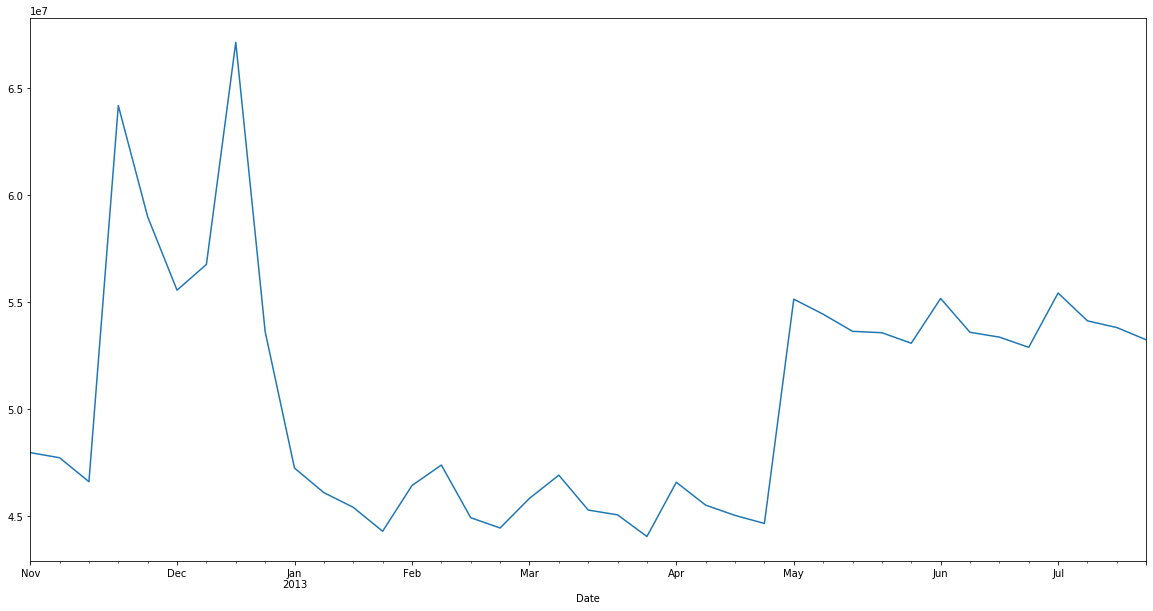

In [255]:
fig, ax = plt.subplots(figsize=(20,10))

df_main2_test.groupby(['Date']).sum()[0].plot(ax=ax)

In [0]:
#the predicted values are also following a relative trend 

In [0]:
df_submission.to_csv('gdrive/My Drive/riddhi_submission_finl.csv')